# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [ ]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [42]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

import torch
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt
from IPython.display import clear_output

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:**
...

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

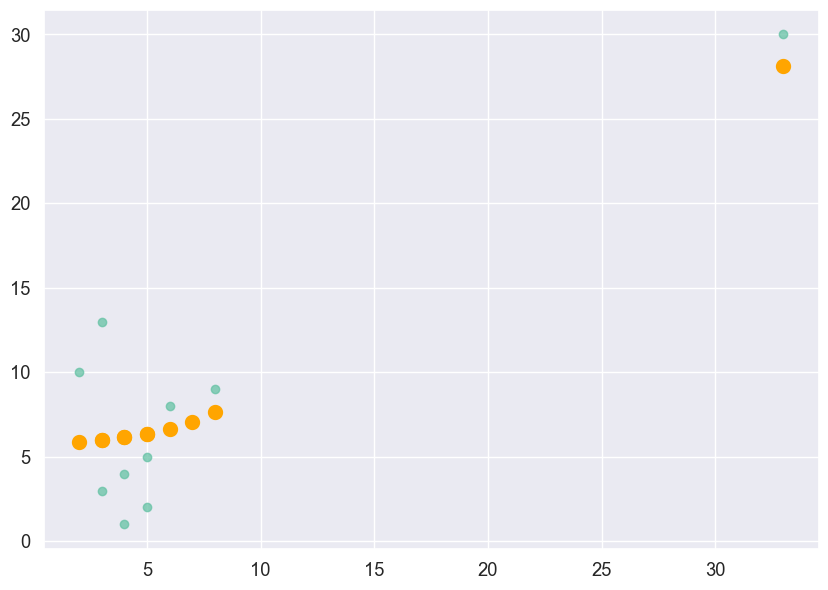

MSE = 12.202


In [3]:
x = torch.FloatTensor([3, 4, 5, 6, 7, 8, 2, 33, 3, 4, 5])
y = torch.FloatTensor([13, 4, 5, 8, 7, 9, 10, 30, 3, 1, 2])

x = x.view(-1, 1)
y = y.view(-1, 1)

model = nn.Sequential(
    nn.Linear(1, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1)
)

for param in model.parameters():
    nn.init.constant_(param, 1.0)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x)
    loss = optim_func(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        clear_output(wait=True)

with torch.no_grad():
    y_pred = model(x)
    plt.figure(figsize=(10, 7))
    plt.scatter(x.numpy(), y.numpy(), alpha=0.75)
    plt.scatter(x.numpy(), y_pred.numpy(), color='orange', linewidth=5)
    plt.show()

    print(f"MSE = {loss:.3f}")


Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [53]:
np.random.seed(42)

sample_size = int(1e6)

X_ = sps.norm.rvs(size=(sample_size, 1))
Y_ = np.sin(X_[:, 0])
X_train, X_test = train_test_split(X_, test_size=0.2)
Y_train = np.sin(X_train[:, 0])
Y_test = np.sin(X_test[:, 0])


Обучите нейросеть на этих данных. Используйте код с занятия.

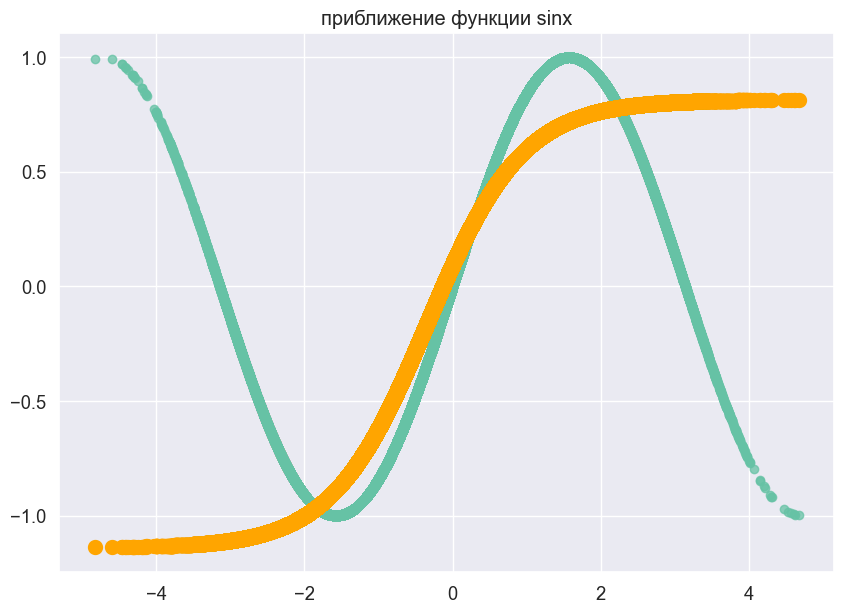

MSE = 0.038


In [24]:
X = torch.tensor(X_train, dtype=torch.float32)
y = torch.tensor(Y_train, dtype=torch.float32)

X = X.view(-1, 1)
y = y.view(-1, 1)

model = nn.Sequential(
    nn.Linear(1, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1)
)

for param in model.parameters():
    nn.init.constant_(param, 1.0)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = optim_func(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        clear_output(wait=True)


with torch.no_grad():
    y_pred = model(X)
    plt.figure(figsize=(10, 7))
    plt.scatter(X.numpy(), y.numpy(), alpha=0.75)
    plt.scatter(X.numpy(), y_pred.numpy(), color='orange', linewidth=5)
    plt.title('приближение функции sinx')
    plt.show()

    print(f"MSE = {loss:.3f}")

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

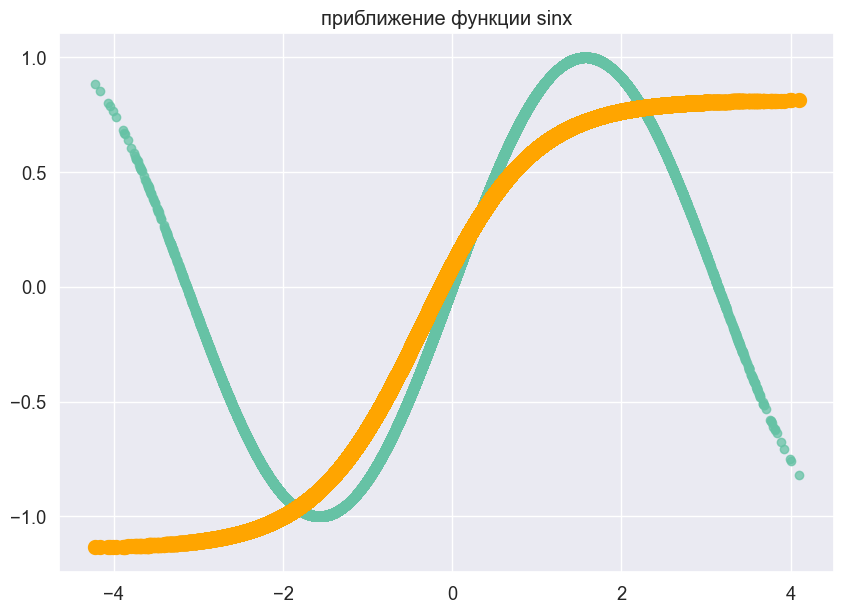

MSE на тестовой выборке = 0.038


In [28]:
X = torch.tensor(X_test, dtype=torch.float32)
y = torch.tensor(Y_test, dtype=torch.float32)

X = X.view(-1, 1)
y = y.view(-1, 1)

model = nn.Sequential(
    nn.Linear(1, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1)
)

for param in model.parameters():
    nn.init.constant_(param, 1.0)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = optim_func(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        clear_output(wait=True)


with torch.no_grad():
    y_pred = model(X)
    plt.figure(figsize=(10, 7))
    plt.scatter(X.numpy(), y.numpy(), alpha=0.75)
    plt.scatter(X.numpy(), y_pred.numpy(), color='orange', linewidth=5)
    plt.title('приближение функции sinx')
    plt.show()

    print(f"MSE на тестовой выборке = {loss:.3f}")

**Вывод:**
В данной задаче я убрал функцию show_progress.
Во втором примере можно заметить что обучение происходит заметно дольше из-за размера обучающей выборки. Итоговое приближение получается не очень качественным, но при этом MSE очень маленькое. Думаю, что следует использовать другую функию ошибки.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [37]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        '''
        Инициализация нейронной сети.

        Аргументы:
        input_size -- размер входного слоя;
        hidden_size -- размер скрытого слоя;
        output_size -- размер выходного слоя.
        '''

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.w21 = np.random.randn(hidden_size, input_size)
        self.w22 = np.random.randn(hidden_size, input_size)
        self.b2 = np.zeros((hidden_size, 1))
        self.wout = np.random.randn(output_size, hidden_size)
        self.bout = np.zeros((output_size, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        self.num1 = np.dot(self.w21, X.T) + self.b2
        self.num2 = np.dot(self.w22, X.T) + self.b2
        self.hidden_output = self.sigmoid(self.num1)
        self.output = np.dot(self.wout, self.hidden_output) + self.bout
        return self.output.T

    def fit(self, X, Y, batch_size=32):
        learning_rate = 0.01
        num_epochs = 1000
        num_samples = X.shape[0]

        for epoch in range(num_epochs):
            for i in range(0, num_samples, batch_size):
                # Получаем батчи данных
                batch_X = X[i:i+batch_size]
                batch_Y = Y[i:i+batch_size]

                output = self.forward(batch_X)

                grad_output = 2 * (output - np.array(batch_Y)) / len(batch_Y)
                grad_wout = np.dot(grad_output.T, self.hidden_output.T)
                grad_bout = np.sum(grad_output, axis=0, keepdims=True).T
                grad_hidden = np.dot(self.wout.T, grad_output.T) * self.hidden_output * (1 - self.hidden_output)
                grad_w21 = np.dot(grad_hidden, batch_X)
                grad_w22 = np.dot(grad_hidden, batch_X)
                grad_b2 = np.sum(grad_hidden, axis=1, keepdims=True)

                self.w21 -= learning_rate * grad_w21
                self.w22 -= learning_rate * grad_w22
                self.b2 -= learning_rate * grad_b2
                self.wout -= learning_rate * grad_wout
                self.bout -= learning_rate * grad_bout

        return self


    def predict(self, X):
        return self.forward(X)


Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

In [55]:
X = torch.tensor(X_train, dtype=torch.float32)
y = torch.tensor(Y_train, dtype=torch.float32)

X = X.view(-1, 1)
y = y.view(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

y_pred_linear = linear_regressor.predict(X)
mse_linear = mean_squared_error(y, y_pred_linear)
print("линейная регрессия MSE:", mse_linear)

nn = NeuralNetwork(input_size=1, hidden_size=4, output_size=1)
nn.fit(X, y)

y_pred_nn = nn.predict(X)
mse_nn = mean_squared_error(y, y_pred_nn)
print("нейронная сеть MSE:", mse_nn)

y_pred_torch = model(x).detach().numpy()
mse_torch = mean_squared_error(y, y_pred_torch)
print("pytotch-сеть из задачи 2 MSE:", mse_torch)

линейная регрессия MSE: 0.06438852


KeyboardInterrupt: 

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

In [56]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
y_pred_linear = linear_regressor.predict(X_test)
mse_linear = mean_squared_error(Y_test, y_pred_linear)
print("линейная регрессия MSE на тестовой выборке:", mse_linear)

nn = NeuralNetwork(input_size=1, hidden_size=4, output_size=1)
nn.fit(X_train, Y_train)
y_pred_nn = nn.predict(X_test)
mse_nn = mean_squared_error(Y_test, y_pred_nn)
print("нейронная сеть MSE на тестовой выборке:", mse_nn)

y_pred_torch = model(X_test).detach().numpy()
mse_torch = mean_squared_error(Y_test, y_pred_torch)
print("PyTorch-сеть из задачи 2 MSE на тестовой выборке:", mse_torch)

plt.scatter(X_test, Y_test, color='black', label='Исходные данные')
plt.plot(X_test, y_pred_linear, color='blue', linewidth=2, label='Линейная регрессия')
plt.plot(X_test, y_pred_nn, color='red', linewidth=2, label='Нейронная сеть')
plt.plot(X_test, y_pred_torch, color='green', linewidth=2, label='PyTorch-сеть')
plt.legend()
plt.show()

линейная регрессия MSE на тестовой выборке: 0.06399189504381814


ValueError: shapes (4,1) and (32,32) not aligned: 1 (dim 1) != 32 (dim 0)

Повторите вычисления для другой нелинейной функции $y(x)$.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

model = nn.Sequential(
    nn.Linear(1, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1)
)

for param in model.parameters():
    nn.init.constant_(param, 1.0)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = optim_func(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Вычисление MSE на тестовой выборке
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    plt.figure(figsize=(10, 7))
    plt.scatter(X_test_tensor.numpy(), y_test_tensor.numpy(), alpha=0.75)
    plt.scatter(X_test_tensor.numpy(), y_pred_test.numpy(), color='orange', linewidth=5, )
    plt.scatter(X_test_tensor.numpy(), y_pred_linear, color='red', linewidths=5)
    plt.scatter(X_test_tensor.numpy(), y_pred_torch, color='blue', linewidths=5)
    plt.xlabel('X')
    plt.legend(['sinx','linear','torch'])
    plt.show()
    print(f"MSE на тестовой выборке: {loss:.3f}")

AttributeError: 'NeuralNetwork' object has no attribute 'Sequential'

**Вывод:**
Так как функция синус, то минимазация ошибки хорошая, но при это график неправильно восстановлен, так как у сигмоиды наверно происходит затухание градиента, но я не уверен.
Я специально ради интереса сделал ужасную и маленькую выборку данных. Думаю, что в реальной жизни данные выглядят сильно иначе, поэтому в первых случаях нейронка справилась лучше, она же вроде долнжа учитывать нерациональный выбор, но я опять же не уверен. Получился интересный резаультат, но остался вопрос как избавиться от затухания градиента в данной задаче если используется функция активации сигмоида.
